# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/Mall_Customers.csv')

# We dont know the categories ahead of time, we are using clustering to 
#find out thoes classes based on income and spending score

X = data.iloc[:, [3,4]].values

- find optimal number of clusters using dendrogram

In [3]:
#scipy contains tools to do hierrichcal clustering
import scipy.cluster.hierarchy as sch

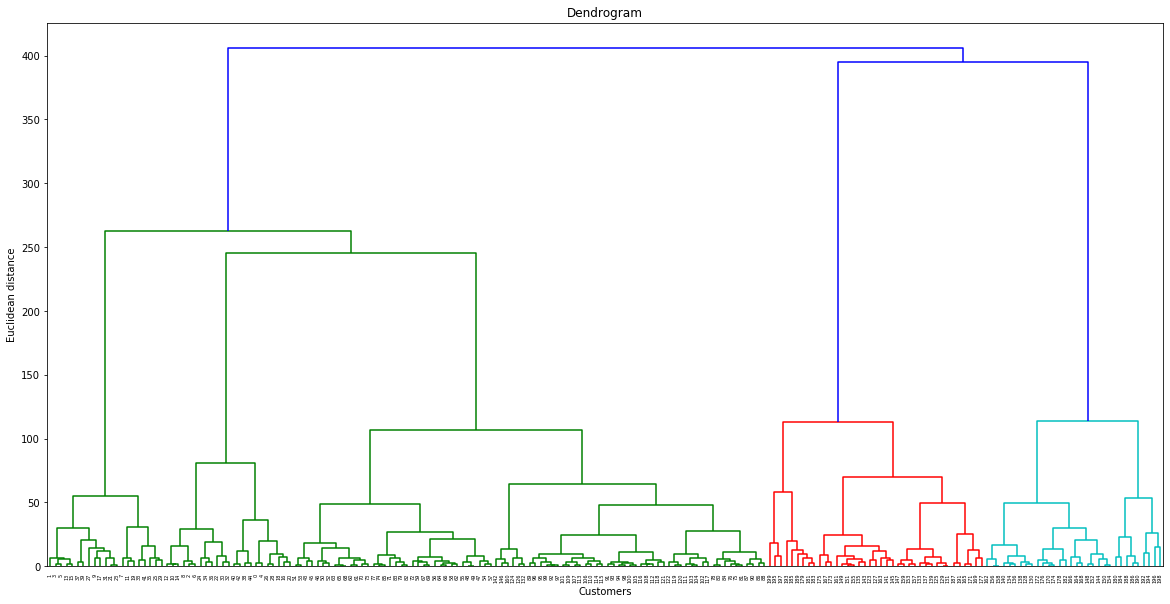

In [4]:
# ward method tries to minimize variance within each cluster
plt.figure(figsize=(20,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')


dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()

we see that optimal number of clusters is 5 

Now lets fit the HC to the dataset 

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
hc = AgglomerativeClustering(n_clusters=5, 
                             affinity='euclidean', 
                             linkage='ward'
                             )
y_hc = hc.fit_predict(X)

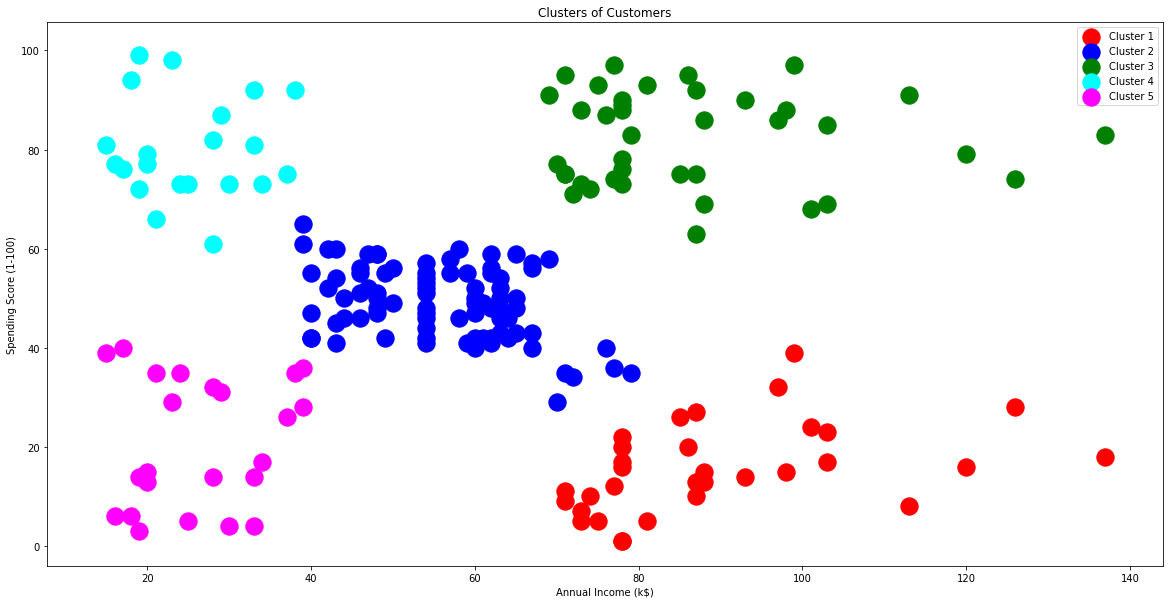

In [7]:
# Visualize the results
plt.figure(figsize=(20,10))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], c='red', s =300, label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], c='blue', s =300, label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], c='green', s =300, label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], c='cyan', s =300, label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], c='magenta', s =300, label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

